# Proyecto final: Generalización de enfermedades cardiovasculares

## Curso: Aprendizaje Automático - Ciencia de Datos

## Prof. Dr.Ing. Felipe Meza-Obando

### Estudiantes

   - Roberto Baltodano
   - Sergio Blanco

# Selección del Dataset
https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

## Descripcion del conjunto de datos:
Las enfermedades cardiovasculares (ECV) son la principal causa de muerte en el mundo, cobrando aproximadamente 17,9 millones de vidas cada año, lo que representa el 31 % de todas las muertes a nivel global. Cuatro de cada cinco muertes por ECV se deben a ataques cardíacos y accidentes cerebrovasculares, y un tercio de estas muertes ocurren de forma prematura en personas menores de 70 años. La insuficiencia cardíaca es un evento común causado por las ECV, y este conjunto de datos contiene 11 características que pueden utilizarse para predecir una posible enfermedad cardíaca.

Las personas con enfermedad cardiovascular o con alto riesgo cardiovascular (debido a la presencia de uno o más factores de riesgo como hipertensión, diabetes, hiperlipidemia o una enfermedad ya establecida) necesitan una detección y un manejo tempranos, en los cuales un modelo de aprendizaje automático puede ser de gran ayuda.

## Características del dataset
- Cantidad de columnas: 12
- Cantidad de filas: 918
- Tiene valores faltantes? No

## Información de los atributos
| **Atributo** | **Descripción** |
|---------------|-----------------------------|
| 1. **Age** | Edad del paciente [en años] |
| 2. **Sex** | Sexo del paciente [M: Masculino, F: Femenino] |
| 3. **ChestPainType** | Tipo de dolor en el pecho [TA: Angina Típica, ATA: Angina Atípica, NAP: Dolor No Anginoso, ASY: Asintomático] |
| 4. **RestingBP** | Presión arterial en reposo [mm Hg] |
| 5. **Cholesterol** | Colesterol sérico [mm/dl] |
| 6. **FastingBS** | Nivel de azúcar en sangre en ayunas [1: si FastingBS > 120 mg/dl, 0: de lo contrario] |
| 7. **RestingECG** | Resultados del electrocardiograma en reposo [Normal: Normal, ST: con anormalidad en la onda ST-T (inversiones de onda T y/o elevación o depresión del ST > 0.05 mV), LVH: muestra hipertrofia ventricular izquierda probable o definitiva según los criterios de Estes] |
| 8. **MaxHR** | Frecuencia cardíaca máxima alcanzada [Valor numérico entre 60 y 202] |
| 9. **ExerciseAngina** | Angina inducida por el ejercicio [Y: Sí, N: No] |
| 10. **Oldpeak** | Oldpeak = ST [Valor numérico medido en depresión] |
| 11. **ST_Slope** | Pendiente del segmento ST en el ejercicio máximo [Up: ascendente, Flat: plana, Down: descendente] |
| 12. **HeartDisease** | Clase de salida [1: enfermedad cardíaca, 0: normal] |


## Resumen de la fuente de los datos
- Cleveland: 303 observaciones
- Hungaria: 294 observaciones
- Suiza: 123 observaciones
- Long Beach VA: 200 observaciones
- Conjunto de datos (corazón) de Stalog: 270 observaciones

Total: 1190. Observaciones repetidas: 272.

In [1]:
# Instalación de dependencias, realizar este paso solo la primera vez en su venv
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install polars
%pip install scikit-learn
%pip install kagglehub


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may ne

In [19]:
# Importacion del dataset y vista previa
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB # Modelos de Probabilidad y Bayes
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "heart.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "fedesoriano/heart-failure-prediction",
  file_path
)

# Save the dataframe to CSV
data = df.to_csv('heart_data.csv', index=False)

print("Primeras 5 observaciones:")
print(df.head())
print("Forma de los datos ", df.shape)
print("Tipos de los datos ")
print(df.dtypes)

# Identify numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"Columnas numéricas ({len(numerical_cols)}):")
print(numerical_cols)
print("\n" + "="*50 + "\n")

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Split categorical into binary and multi-choice
binary_categorical = []
multi_categorical = []

for col in categorical_cols:
    unique_count = df[col].nunique()
    if unique_count == 2:
        binary_categorical.append(col)
    else:
        multi_categorical.append(col)

# You might also want to check numerical columns that are actually binary
for col in numerical_cols:
    unique_count = df[col].nunique()
    if unique_count == 2:
        print(f"Nota: '{col}' es numérica pero tiene solo 2 valores únicos: {df[col].unique()}")

print(f"Columnas categóricas binarias ({len(binary_categorical)}):")
for col in binary_categorical:
    print(f"  - {col}: {df[col].unique()}")
print("\n" + "="*50 + "\n")

print(f"Columnas categóricas múltiples ({len(multi_categorical)}):")
for col in multi_categorical:
    print(f"  - {col} ({df[col].nunique()} valores únicos): {df[col].unique()}")

# Agrupación de categorías
# Se agruparán las categorías de acuerdo a sus tipos.
numericas = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]
categoricas_binarias = ["Sex", "FastingBS", "ExerciseAngina", "HeartDisease"]
categoricas_multiples = ["ChestPainType", "RestingECG", "ST_Slope"]
categoricas = categoricas_binarias + categoricas_multiples

/var/folders/nb/jnfr08sd4zs71m15hd_xbzrm0000gn/T/ipykernel_2410/2859499693.py:24: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Primeras 5 observaciones:
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
Forma de los datos  (918, 12)
Tipos de los datos 
Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
F

## EDA
Se explorará la columna target: HeartDisease y su distribución. Así como las diferentes variables del dataset

### Target variable: Heart Disease
Vemos como el dataset tiene datos balanceados para los resultados negativos como positivos en el siguiente gráfico.

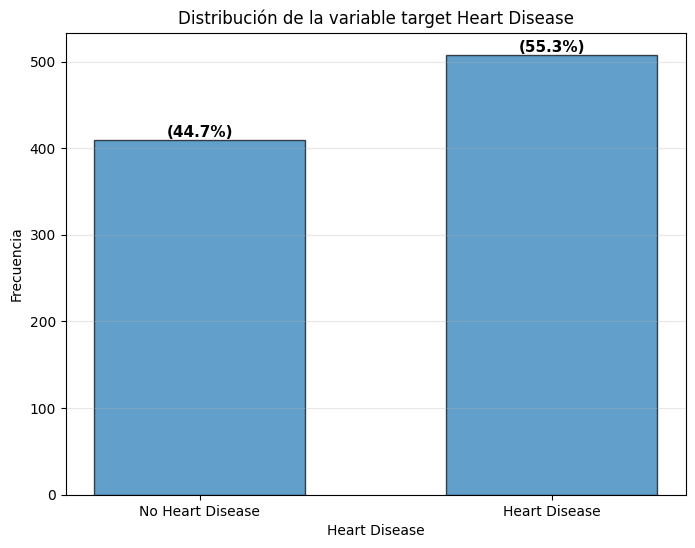

In [18]:
import matplotlib.pyplot as plt

# Calculate counts and percentages
counts = df['HeartDisease'].value_counts().sort_index()
total = len(df)
percentages = (counts / total) * 100

plt.figure(figsize=(8, 6))
bars = plt.bar([0, 1], counts, edgecolor='black', alpha=0.7, width=0.6)
plt.xlabel('Heart Disease')
plt.ylabel('Frecuencia')
plt.title('Distribución de la variable target Heart Disease')
plt.xticks([0, 1], ['No Heart Disease', 'Heart Disease'])
plt.grid(True, alpha=0.3, axis='y')

# Add percentage labels on top of bars
for i, (bar, count, pct) in enumerate(zip(bars, counts, percentages)):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'({pct:.1f}%)',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.show()


### Resumen estadístico de las variables numéricas

In [20]:
df[numericas].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2


#### Interpretación del Resumen Estadístico

**Age (Edad)**
- **Media:** 53.5 años - La edad promedio de los pacientes en el estudio.
- **Desviación estándar:** 9.4 años - Indica una variabilidad moderada en las edades.
- **Rango:** 28-77 años - El paciente más joven tiene 28 años y el mayor tiene 77 años.
- **Mediana (50%):** 54 años - La mitad de los pacientes tienen 54 años o menos.
- **Interpretación:** El conjunto de datos está compuesto principalmente por adultos de mediana edad a adultos mayores, con una distribución relativamente uniforme.

---

**RestingBP (Presión Arterial en Reposo)**
- **Media:** 132.4 mm Hg - Ligeramente por encima del rango normal (120/80 mm Hg).
- **Desviación estándar:** 18.5 mm Hg - Variabilidad considerable en los valores de presión arterial.
- **Rango:** 0-200 mm Hg - **Nota:** El valor mínimo de 0 sugiere posibles datos faltantes o errores de medición.
- **Mediana (50%):** 130 mm Hg - La mitad de los pacientes tienen presión arterial de 130 mm Hg o menos.
- **Interpretación:** La mayoría de los pacientes presentan presión arterial en el rango de prehipertensión a hipertensión leve. Los valores de 0 deberían investigarse como posibles datos anómalos.

---

**Cholesterol (Colesterol Sérico)**
- **Media:** 198.8 mm/dl - Dentro del rango limítrofe alto según los estándares médicos.
- **Desviación estándar:** 109.4 mm/dl - Variabilidad muy alta, sugiriendo gran diversidad en los niveles de colesterol.
- **Rango:** 0-603 mm/dl - **Nota:** El valor mínimo de 0 indica datos faltantes o errores de registro.
- **Mediana (50%):** 223 mm/dl - La mitad de los pacientes tienen colesterol de 223 mm/dl o menos.
- **Interpretación:** Existe una amplia variación en los niveles de colesterol. Los valores de 0 requieren limpieza de datos antes del análisis.

---

**MaxHR (Frecuencia Cardíaca Máxima)**
- **Media:** 136.8 latidos por minuto - Frecuencia cardíaca máxima promedio alcanzada durante el ejercicio.
- **Desviación estándar:** 25.5 latidos por minuto - Variabilidad moderada.
- **Rango:** 60-202 latidos por minuto - Todos los valores están dentro de rangos fisiológicamente plausibles.
- **Mediana (50%):** 138 latidos por minuto - La mitad de los pacientes alcanzan 138 lpm o menos.
- **Interpretación:** Los valores son consistentes con pruebas de esfuerzo cardíaco típicas. No se observan valores anómalos evidentes.

---

**Oldpeak (Depresión del ST)**
- **Media:** 0.89 - Depresión promedio del segmento ST durante el ejercicio.
- **Desviación estándar:** 1.07 - Variabilidad considerable.
- **Rango:** -2.6 a 6.2 - Los valores negativos pueden indicar elevación del ST en lugar de depresión.
- **Mediana (50%):** 0.6 - La mitad de los pacientes tienen una depresión de 0.6 o menos.
- **Interpretación:** La mayoría de los pacientes muestran algún grado de depresión del ST, que es un indicador importante de isquemia cardíaca. Valores más altos están asociados con mayor riesgo de enfermedad cardíaca.